In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [94]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [103]:
X_valid, X_train = X_train_full[:5000] ,X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [104]:
class_names = [ "Tshirt" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag", "Ankle boot" ]

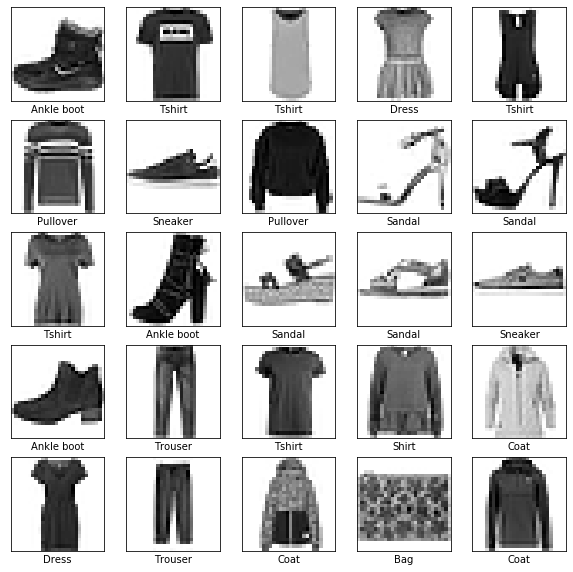

In [105]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [106]:
X_valid, X_train = X_valid / 255., X_train / 255.
X_test = X_test / 255

In [107]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.Dense(300, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(10, activation = "softmax" )])

In [108]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 286,810
Trainable params: 286,810
Non-trainable params: 0
________________________________________________

In [109]:
model.compile(loss = "sparse_categorical_crossentropy",
optimizer = "sgd",
metrics = ["accuracy"])

In [110]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7965 - accuracy: 0.7300 - val_loss: 0.4956 - val_accuracy: 0.8322
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4884 - accuracy: 0.8260 - val_loss: 0.4703 - val_accuracy: 0.8332
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4341 - accuracy: 0.8441 - val_loss: 0.4178 - val_accuracy: 0.8490
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4011 - accuracy: 0.8558 - val_loss: 0.3828 - val_accuracy: 0.8652
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8641 - val_loss: 0.3692 - val_accuracy: 0.8682
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3597 - accuracy: 0.8692 - val_loss: 0.3538 - val_accuracy: 0.8718
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3463 - accuracy: 0.8729 - val_loss: 0.3564 - val_accuracy:

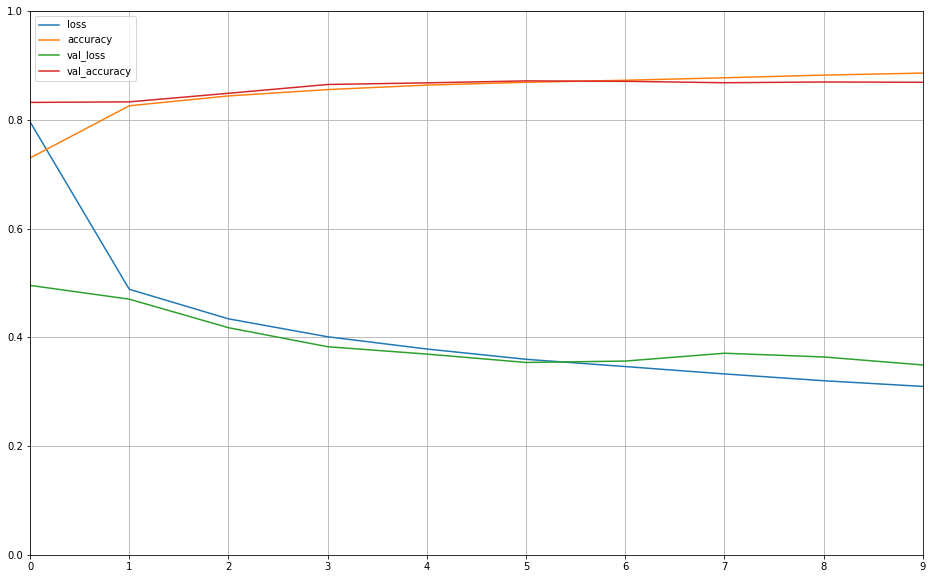

In [111]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [112]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8519


[0.39326637983322144, 0.8518999814987183]

In [98]:
data = pd.read_csv(r"C:\Users\BEST BUY\Desktop\A_Z Handwritten Data.csv").astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [113]:
X = data.drop('0',axis = 1)
y = data['0']


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [118]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [119]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

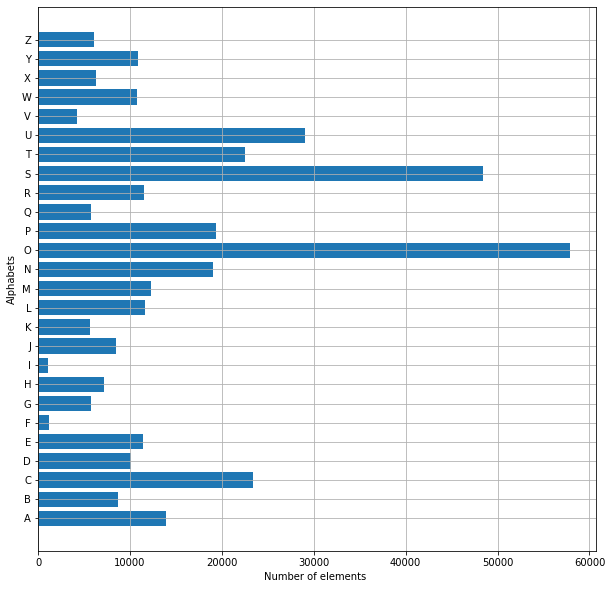

In [120]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

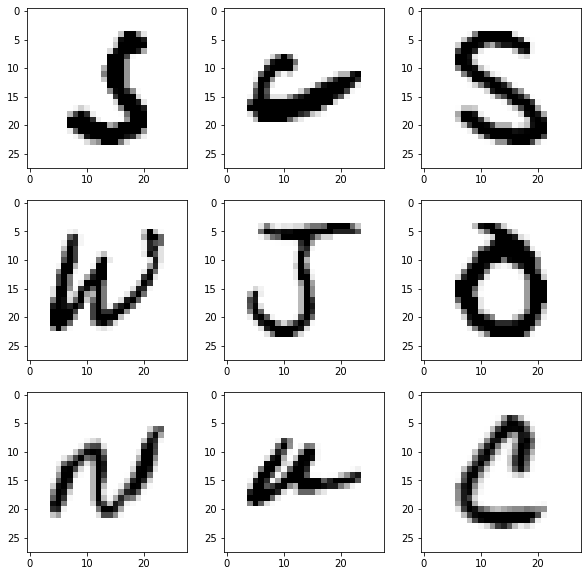

In [123]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [125]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [127]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [128]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

NameError: name 'Adam' is not defined